In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [94]:
df = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\fdf_gdf.csv', low_memory=False, sep=",")

In [95]:
# Convert categorical columns to category type for memory efficiency
df["rideable_type"] = df["rideable_type"].astype("category")
df["start_station_name"] = df["start_station_name"].astype("category")
df["end_station_name"] = df["end_station_name"].astype("category")
df["member_casual"] = df["member_casual"].astype("category")
df["day_of_week"] = df["day_of_week"].astype("category")
df["holiday"] = df["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df["holiday"] = df["holiday"].astype("category")

df['month'] = df['month'].astype('int32')

df["ride_duration"] = pd.to_timedelta(df["ride_duration"])

In [96]:
pd.set_option("display.max_columns", None)

In [97]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward,ride_duration_min
0,7368109,electric_bike,2023-05-05 10:57:59,2023-05-05 11:21:16,0,0.0,17th St & Rhode Island Ave NW,31210.0,38.880000,-77.010000,38.906767,-77.038627,member,3.872587,5,2023,Spring,Friday,No,No,0 days 00:23:17,6,2,23.283333
1,6480084,classic_bike,2023-02-08 17:29:29,2023-02-08 17:52:32,Hamlin & 7th St NE,31514.0,Adams Mill & Columbia Rd NW,31104.0,38.927497,-76.997194,38.922849,-77.042525,casual,3.955272,2,2023,Winter,Wednesday,No,No,0 days 00:23:03,5,1,23.050000
2,6546649,classic_bike,2023-02-17 10:40:44,2023-02-17 10:52:14,Eckington Pl & Q St NE,31505.0,New Jersey Ave & F St NW,31655.0,38.910972,-77.004950,38.897108,-77.011616,member,1.645987,2,2023,Winter,Friday,No,No,0 days 00:11:30,5,6,11.500000
3,8494852,classic_bike,2023-07-21 21:31:20,2023-07-21 21:38:29,New Hampshire Ave & Ward Pl NW,31212.0,16th & R St NW,31282.0,38.905711,-77.047318,38.912652,-77.036278,casual,1.228064,7,2023,Summer,Friday,No,No,0 days 00:07:09,2,2,7.150000
4,10613115,electric_bike,2023-12-19 17:34:05,2023-12-19 17:39:06,14th & Belmont St NW,31119.0,14th & Otis Pl NW,31131.0,38.921051,-77.031750,38.934405,-77.032687,member,1.487133,12,2023,Winter,Tuesday,No,No,0 days 00:05:01,1,1,5.016667


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839783 entries, 0 to 839782
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             839783 non-null  int64          
 1   rideable_type       839783 non-null  category       
 2   started_at          839783 non-null  datetime64[ns] 
 3   ended_at            839783 non-null  datetime64[ns] 
 4   start_station_name  839783 non-null  category       
 5   start_station_id    839783 non-null  float64        
 6   end_station_name    839783 non-null  category       
 7   end_station_id      839783 non-null  float64        
 8   start_lat           839783 non-null  float64        
 9   start_lng           839783 non-null  float64        
 10  end_lat             839783 non-null  float64        
 11  end_lng             839783 non-null  float64        
 12  member_casual       839783 non-null  category       
 13  distance      

In [99]:
# Add month and end_hour columns
import pandas as pd

# Ensure datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extract hours
df['month'] = df['started_at'].dt.hour
df['end_hour'] = df['ended_at'].dt.hour


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839783 entries, 0 to 839782
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             839783 non-null  int64          
 1   rideable_type       839783 non-null  category       
 2   started_at          839783 non-null  datetime64[ns] 
 3   ended_at            839783 non-null  datetime64[ns] 
 4   start_station_name  839783 non-null  category       
 5   start_station_id    839783 non-null  float64        
 6   end_station_name    839783 non-null  category       
 7   end_station_id      839783 non-null  float64        
 8   start_lat           839783 non-null  float64        
 9   start_lng           839783 non-null  float64        
 10  end_lat             839783 non-null  float64        
 11  end_lng             839783 non-null  float64        
 12  member_casual       839783 non-null  category       
 13  distance      

In [101]:
df_numeric = df.select_dtypes(include=['float', 'int']).dropna().copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839783 entries, 0 to 839782
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            839783 non-null  int64  
 1   start_station_id   839783 non-null  float64
 2   end_station_id     839783 non-null  float64
 3   start_lat          839783 non-null  float64
 4   start_lng          839783 non-null  float64
 5   end_lat            839783 non-null  float64
 6   end_lng            839783 non-null  float64
 7   distance           839783 non-null  float64
 8   month              839783 non-null  int32  
 9   year               839783 non-null  int64  
 10  start_ward         839783 non-null  int64  
 11  end_ward           839783 non-null  int64  
 12  ride_duration_min  839783 non-null  float64
 13  end_hour           839783 non-null  int32  
dtypes: float64(8), int32(2), int64(4)
memory usage: 83.3 MB


# Preparing the data

In [107]:

# Ensure the 'start_hour' column exists in the DataFrame
if 'start_hour' not in df.columns:
    # Extract the hour from the 'started_at' column
    df['start_hour'] = df['started_at'].dt.hour

# Ensure all selected columns exist in the DataFrame
required_columns = ["start_ward", 
                    "end_ward",
                    "start_hour",
                    "end_hour",
                    "start_station_id", 
                    "end_station_id",
                    "month"]

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following required columns are missing in the DataFrame: {missing_columns}")

# Select features to predict bike rides
df_select = df[required_columns]


In [108]:
df_select

,start_ward,end_ward,start_hour,end_hour,start_station_id,end_station_id,month
0,6,2,10,11,0.0,31210.0,10
1,5,1,17,17,31514.0,31104.0,17
2,5,6,10,10,31505.0,31655.0,10
3,2,2,21,21,31212.0,31282.0,21
4,1,1,17,17,31119.0,31131.0,17
...,...,...,...,...,...,...,...
839778,2,2,11,11,31240.0,31289.0,11
839779,3,3,14,15,31334.0,31320.0,14
839780,6,6,6,7,31615.0,31623.0,6
839781,2,6,13,13,31324.0,31265.0,13


In [109]:
df_select.shape

(839783, 7)

In [110]:
zero_rows = (df_select['start_station_id'] == 0).sum()
print(f"Number of rows with start_station_id = 0: {zero_rows}")

# Now filter out those rows
df_select = df_select[df_select['start_station_id'] != 0]


Number of rows with start_station_id = 0: 35830


In [111]:
# Remove the rows where start_station_id == 0
df_select = df_select[df_select['start_station_id'] != 0]


In [112]:
df_select.shape

(803953, 7)

# ML Model

In [114]:
df_select


,start_ward,end_ward,start_hour,end_hour,start_station_id,end_station_id,month
1,5,1,17,17,31514.0,31104.0,17
2,5,6,10,10,31505.0,31655.0,10
3,2,2,21,21,31212.0,31282.0,21
4,1,1,17,17,31119.0,31131.0,17
5,2,1,0,0,31227.0,31135.0,0
...,...,...,...,...,...,...,...
839778,2,2,11,11,31240.0,31289.0,11
839779,3,3,14,15,31334.0,31320.0,14
839780,6,6,6,7,31615.0,31623.0,6
839781,2,6,13,13,31324.0,31265.0,13


In [ ]:
df_select.head()

In [ ]:
df_select.info()

In [115]:
df_w2 = df_select[df_select['start_ward'] == 2]

In [116]:
df_w2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343352 entries, 3 to 839782
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_ward        343352 non-null  int64  
 1   end_ward          343352 non-null  int64  
 2   start_hour        343352 non-null  int32  
 3   end_hour          343352 non-null  int32  
 4   start_station_id  343352 non-null  float64
 5   end_station_id    343352 non-null  float64
 6   month             343352 non-null  int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 17.0 MB


# ML Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# df_counts_w2 = df_w2.groupby(['start_ward', 'end_ward', 'month', 'start_hour'])['start_station_id'].count().reset_index()
# df_counts_w2.rename(columns={'start_station_id': 'ride_count'}, inplace=True)


In [ ]:
# Aggregate ride counts by month
df_counts_w2 = df_w2.groupby(['start_ward', 'end_ward', 'month'])['start_station_id'].count().reset_index()
df_counts_w2.rename(columns={'start_station_id': 'ride_count'}, inplace=True)


In [ ]:
df_counts_w2

,start_ward,end_ward,month,ride_count
0,2,1,1,2428
1,2,1,2,2503
2,2,1,3,3086
3,2,1,4,4033
4,2,1,5,4328
...,...,...,...,...
91,2,8,8,197
92,2,8,9,192
93,2,8,10,173
94,2,8,11,114


In [ ]:
df_counts_w2.head(20)

,start_ward,end_ward,month,ride_count
0,2,1,1,2428
1,2,1,2,2503
2,2,1,3,3086
3,2,1,4,4033
4,2,1,5,4328
...,...,...,...,...
15,2,2,4,20119
16,2,2,5,21305
17,2,2,6,20374
18,2,2,7,23126


In [ ]:
month = df_counts_w2["month"]
end_ward = df_counts_w2["end_ward"]
ride_count = df_counts_w2["ride_count"]

print(month.shape)
print(end_ward.shape)
print(ride_count.shape)


(96,)
(96,)
(96,)


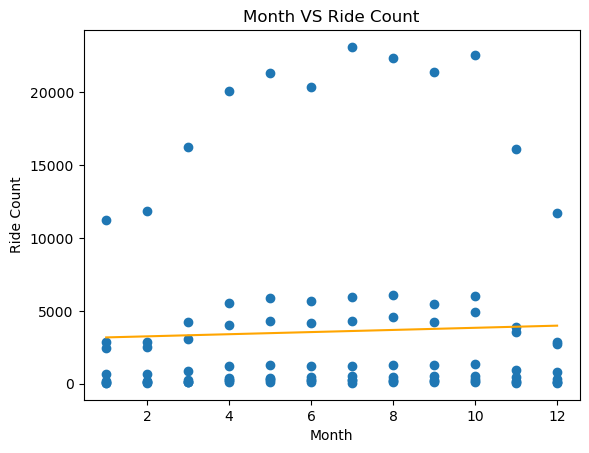

In [ ]:
plt.title("Month VS Ride Count")
plt.xlabel('Month')
plt.ylabel('Ride Count')


plt.plot(np.unique(month), np.poly1d(np.polyfit(month, ride_count, 1))(np.unique(month)) , color='orange')

plt.scatter(month, ride_count)

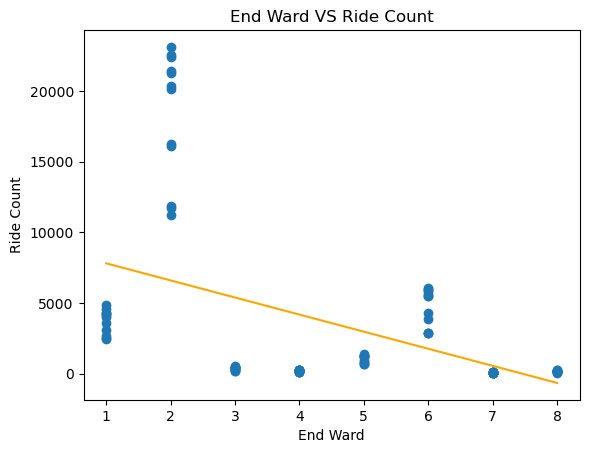

In [ ]:
plt.title("End Ward VS Ride Count")
plt.xlabel('End Ward')
plt.ylabel('Ride Count')

# Flatten the arrays to 1D
end_ward_flat = end_ward.ravel()
ride_count_flat = ride_count.ravel()

plt.plot(np.unique(end_ward_flat), np.poly1d(np.polyfit(end_ward_flat, ride_count_flat, 1))(np.unique(end_ward_flat)), color='orange')

plt.scatter(end_ward_flat, ride_count_flat)

In [ ]:
# Reshape the dfs to have value for the column instead of a null.

end_ward = end_ward.reshape(-1, 1)
month = month.reshape(-1, 1)
ride_count = ride_count.reshape(-1, 1)

print(end_ward.shape)
print(month.shape)
print(ride_count.shape)


(96, 1)
(96, 1)
(96, 1)


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Train the model

## Predict ride count based on end Ward

In [ ]:
end_ward_train, end_ward_test, ride_count_train, ride_count_test = train_test_split(end_ward,
                                                                            ride_count,
                                                                            test_size=0.2,
                                                                            random_state=0)

In [ ]:
end_ward_train


array([[4],
       [6],
       [1],
       [8],
       [4],
       [5],
       [1],
       [8],
       [7],
       [7],
       [6],
       [7],
       [8],
       [8],
       [5],
       [3],
       [2],
       [5],
       [6],
       [7],
       [1],
       [6],
       [4],
       [4],
       [1],
       [2],
       [2],
       [4],
       [4],
       [1],
       [8],
       [5],
       [1],
       [3],
       [3],
       [5],
       [1],
       [3],
       [2],
       [5],
       [1],
       [3],
       [8],
       [5],
       [7],
       [3],
       [7],
       [2],
       [7],
       [2],
       [3],
       [5],
       [8],
       [8],
       [6],
       [2],
       [8],
       [7],
       [7],
       [3],
       [4],
       [4],
       [4],
       [6],
       [5],
       [2],
       [6],
       [4],
       [2],
       [7],
       [1],
       [8],
       [6],
       [6],
       [4],
       [4]], dtype=int64)

In [ ]:
ride_count_train

array([[  259],
       [ 4264],
       [ 4033],
       [  129],
       [  293],
       [  685],
       [ 4303],
       [   98],
       [   81],
       [   93],
       [ 2865],
       [   90],
       [   93],
       [  197],
       [ 1236],
       [  388],
       [23126],
       [ 1271],
       [ 5524],
       [   47],
       [ 2503],
       [ 2878],
       [  241],
       [  248],
       [ 4328],
       [20119],
       [20374],
       [  294],
       [  133],
       [ 4174],
       [  230],
       [  773],
       [ 2428],
       [  429],
       [  415],
       [  855],
       [ 2694],
       [  283],
       [11744],
       [ 1262],
       [ 3568],
       [  486],
       [  215],
       [ 1375],
       [  107],
       [  496],
       [   73],
       [16222],
       [   79],
       [22390],
       [  424],
       [  673],
       [  173],
       [  114],
       [ 6023],
       [21405],
       [  222],
       [   61],
       [  100],
       [  166],
       [  102],
       [  196],
       [

In [ ]:
# Train the model

reg_end_ward = linear_model.LinearRegression()
reg_end_ward.fit(end_ward_train, ride_count_train)


LinearRegression()

# Evaluate the model

In [ ]:
# Predict values using test data.
reg_end_ward_score = (reg_end_ward.score(end_ward_test, ride_count_test) * 100)
print("The accuracy of the ML model based on Living Area is:", reg_end_ward_score , "%")

The accuracy of the ML model based on Living Area is: 19.51883197192967 %


In [ ]:
# Enter the end ward for which we want to predict the monthy ride count.

end_ward_Pred = 2

pred_1 = reg_end_ward.predict([[end_ward_Pred]])

print(f"The monthly ride count for rides ending at Ward {end_ward_Pred} is: {pred_1} and is {reg_end_ward_score}% accurate" )

The monthly ride count for rides ending at Ward 2 is: [[6639.44196905]] and is 19.51883197192967% accurate


## Predict ride count based on month

In [ ]:
month_train, month_test, ride_count_train, ride_count_test = train_test_split(month,
                                                                            ride_count,
                                                                            test_size=0.2,
                                                                            random_state=0)

In [ ]:
# Train the model

reg_month = linear_model.LinearRegression()
reg_month.fit(month_train, ride_count_train)


LinearRegression()

In [ ]:
# Predict values using test data.
reg_month_score = (reg_month.score(month_test, ride_count_test) * 100)
print("The accuracy of the ML model based on Living Area is:", reg_month_score , "%")

The accuracy of the ML model based on Living Area is: -0.7620692579943356 %


In [ ]:
# Enter the end ward for which we want to predict the monthy ride count.

month_Pred = 7

pred_2 = reg_month.predict([[month_Pred]])

print(f"The monthly ride count for the month {month_Pred} is: {pred_2} and is {reg_month_score}% accurate" )

The monthly ride count for the month 7 is: [[3482.53234986]] and is -0.7620692579943356% accurate


# Multivariate LR

In [ ]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward,ride_duration_min,start_hour,end_hour
0,7368109,electric_bike,2023-05-05 10:57:59,2023-05-05 11:21:16,0,0.0,17th St & Rhode Island Ave NW,31210.0,38.880000,-77.010000,38.906767,-77.038627,member,3.872587,5,2023,Spring,Friday,No,No,0 days 00:23:17,6,2,23.283333,10,11
1,6480084,classic_bike,2023-02-08 17:29:29,2023-02-08 17:52:32,Hamlin & 7th St NE,31514.0,Adams Mill & Columbia Rd NW,31104.0,38.927497,-76.997194,38.922849,-77.042525,casual,3.955272,2,2023,Winter,Wednesday,No,No,0 days 00:23:03,5,1,23.050000,17,17
2,6546649,classic_bike,2023-02-17 10:40:44,2023-02-17 10:52:14,Eckington Pl & Q St NE,31505.0,New Jersey Ave & F St NW,31655.0,38.910972,-77.004950,38.897108,-77.011616,member,1.645987,2,2023,Winter,Friday,No,No,0 days 00:11:30,5,6,11.500000,10,10
3,8494852,classic_bike,2023-07-21 21:31:20,2023-07-21 21:38:29,New Hampshire Ave & Ward Pl NW,31212.0,16th & R St NW,31282.0,38.905711,-77.047318,38.912652,-77.036278,casual,1.228064,7,2023,Summer,Friday,No,No,0 days 00:07:09,2,2,7.150000,21,21
4,10613115,electric_bike,2023-12-19 17:34:05,2023-12-19 17:39:06,14th & Belmont St NW,31119.0,14th & Otis Pl NW,31131.0,38.921051,-77.031750,38.934405,-77.032687,member,1.487133,12,2023,Winter,Tuesday,No,No,0 days 00:05:01,1,1,5.016667,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839778,6854212,docked_bike,2023-03-26 11:02:45,2023-03-26 11:54:22,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31240.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,38.884120,-77.046570,38.890539,-77.049383,casual,0.754143,3,2023,Spring,Sunday,No,Yes,0 days 00:51:37,2,2,51.616667,11,11
839779,7539054,electric_bike,2023-05-17 14:57:06,2023-05-17 15:04:30,Loughboro Rd & Dalecarlia Pkwy NW / Sibley Hos...,31334.0,American University East Campus,31320.0,38.935900,-77.106693,38.936298,-77.087128,casual,1.692807,5,2023,Spring,Wednesday,No,No,0 days 00:07:24,3,3,7.400000,14,15
839780,9710112,classic_bike,2023-10-10 06:59:57,2023-10-10 07:04:04,6th & H St NE,31615.0,Columbus Circle / Union Station,31623.0,38.899972,-76.998347,38.896960,-77.004930,member,0.660840,10,2023,Autumn,Tuesday,No,No,0 days 00:04:07,6,6,4.116667,6,7
839781,7412461,electric_bike,2023-05-08 13:24:24,2023-05-08 13:33:02,18th & New Hampshire Ave NW,31324.0,5th St & Massachusetts Ave NW,31265.0,38.911218,-77.041814,38.900930,-77.018677,member,2.305842,5,2023,Spring,Monday,No,No,0 days 00:08:38,2,6,8.633333,13,13


## Encode categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['member_casual', 'day_of_week', 'holiday', 'is_weekend']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) + 1  # Shift numbers to start from 1
    label_encoders[col] = le


In [85]:
df_encoded

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,distance,month,year,season,ride_duration,start_ward,end_ward,ride_duration_min,start_hour,end_hour,member_casual_member,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,holiday_Yes,is_weekend_Yes
1,6480084,classic_bike,2023-02-08 17:29:29,2023-02-08 17:52:32,Hamlin & 7th St NE,31514.0,Adams Mill & Columbia Rd NW,31104.0,38.927497,-76.997194,38.922849,-77.042525,3.955272,2,2023,Winter,0 days 00:23:03,5,1,23.050000,17,17,False,False,False,False,False,False,True,False,False
2,6546649,classic_bike,2023-02-17 10:40:44,2023-02-17 10:52:14,Eckington Pl & Q St NE,31505.0,New Jersey Ave & F St NW,31655.0,38.910972,-77.004950,38.897108,-77.011616,1.645987,2,2023,Winter,0 days 00:11:30,5,6,11.500000,10,10,True,False,False,False,False,False,False,False,False
3,8494852,classic_bike,2023-07-21 21:31:20,2023-07-21 21:38:29,New Hampshire Ave & Ward Pl NW,31212.0,16th & R St NW,31282.0,38.905711,-77.047318,38.912652,-77.036278,1.228064,7,2023,Summer,0 days 00:07:09,2,2,7.150000,21,21,False,False,False,False,False,False,False,False,False
4,10613115,electric_bike,2023-12-19 17:34:05,2023-12-19 17:39:06,14th & Belmont St NW,31119.0,14th & Otis Pl NW,31131.0,38.921051,-77.031750,38.934405,-77.032687,1.487133,12,2023,Winter,0 days 00:05:01,1,1,5.016667,17,17,True,False,False,False,False,True,False,False,False
5,8006328,electric_bike,2023-06-18 00:26:26,2023-06-18 00:37:54,13th St & New York Ave NW,31227.0,16th & Harvard St NW,31135.0,38.900273,-77.029905,38.926102,-77.036650,2.930742,6,2023,Summer,0 days 00:11:28,2,1,11.466667,0,0,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839778,6854212,docked_bike,2023-03-26 11:02:45,2023-03-26 11:54:22,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31240.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,38.884120,-77.046570,38.890539,-77.049383,0.754143,3,2023,Spring,0 days 00:51:37,2,2,51.616667,11,11,False,False,False,True,False,False,False,False,True
839779,7539054,electric_bike,2023-05-17 14:57:06,2023-05-17 15:04:30,Loughboro Rd & Dalecarlia Pkwy NW / Sibley Hos...,31334.0,American University East Campus,31320.0,38.935900,-77.106693,38.936298,-77.087128,1.692807,5,2023,Spring,0 days 00:07:24,3,3,7.400000,14,15,False,False,False,False,False,False,True,False,False
839780,9710112,classic_bike,2023-10-10 06:59:57,2023-10-10 07:04:04,6th & H St NE,31615.0,Columbus Circle / Union Station,31623.0,38.899972,-76.998347,38.896960,-77.004930,0.660840,10,2023,Autumn,0 days 00:04:07,6,6,4.116667,6,7,True,False,False,False,False,True,False,False,False
839781,7412461,electric_bike,2023-05-08 13:24:24,2023-05-08 13:33:02,18th & New Hampshire Ave NW,31324.0,5th St & Massachusetts Ave NW,31265.0,38.911218,-77.041814,38.900930,-77.018677,2.305842,5,2023,Spring,0 days 00:08:38,2,6,8.633333,13,13,True,True,False,False,False,False,False,False,False


In [86]:
# Remove the rows where start_station_id == 0
df_encoded = df_encoded[df_encoded['start_station_id'] != 0]


In [87]:
df_encoded

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,distance,month,year,season,ride_duration,start_ward,end_ward,ride_duration_min,start_hour,end_hour,member_casual_member,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,holiday_Yes,is_weekend_Yes
1,6480084,classic_bike,2023-02-08 17:29:29,2023-02-08 17:52:32,Hamlin & 7th St NE,31514.0,Adams Mill & Columbia Rd NW,31104.0,38.927497,-76.997194,38.922849,-77.042525,3.955272,2,2023,Winter,0 days 00:23:03,5,1,23.050000,17,17,False,False,False,False,False,False,True,False,False
2,6546649,classic_bike,2023-02-17 10:40:44,2023-02-17 10:52:14,Eckington Pl & Q St NE,31505.0,New Jersey Ave & F St NW,31655.0,38.910972,-77.004950,38.897108,-77.011616,1.645987,2,2023,Winter,0 days 00:11:30,5,6,11.500000,10,10,True,False,False,False,False,False,False,False,False
3,8494852,classic_bike,2023-07-21 21:31:20,2023-07-21 21:38:29,New Hampshire Ave & Ward Pl NW,31212.0,16th & R St NW,31282.0,38.905711,-77.047318,38.912652,-77.036278,1.228064,7,2023,Summer,0 days 00:07:09,2,2,7.150000,21,21,False,False,False,False,False,False,False,False,False
4,10613115,electric_bike,2023-12-19 17:34:05,2023-12-19 17:39:06,14th & Belmont St NW,31119.0,14th & Otis Pl NW,31131.0,38.921051,-77.031750,38.934405,-77.032687,1.487133,12,2023,Winter,0 days 00:05:01,1,1,5.016667,17,17,True,False,False,False,False,True,False,False,False
5,8006328,electric_bike,2023-06-18 00:26:26,2023-06-18 00:37:54,13th St & New York Ave NW,31227.0,16th & Harvard St NW,31135.0,38.900273,-77.029905,38.926102,-77.036650,2.930742,6,2023,Summer,0 days 00:11:28,2,1,11.466667,0,0,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839778,6854212,docked_bike,2023-03-26 11:02:45,2023-03-26 11:54:22,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31240.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,38.884120,-77.046570,38.890539,-77.049383,0.754143,3,2023,Spring,0 days 00:51:37,2,2,51.616667,11,11,False,False,False,True,False,False,False,False,True
839779,7539054,electric_bike,2023-05-17 14:57:06,2023-05-17 15:04:30,Loughboro Rd & Dalecarlia Pkwy NW / Sibley Hos...,31334.0,American University East Campus,31320.0,38.935900,-77.106693,38.936298,-77.087128,1.692807,5,2023,Spring,0 days 00:07:24,3,3,7.400000,14,15,False,False,False,False,False,False,True,False,False
839780,9710112,classic_bike,2023-10-10 06:59:57,2023-10-10 07:04:04,6th & H St NE,31615.0,Columbus Circle / Union Station,31623.0,38.899972,-76.998347,38.896960,-77.004930,0.660840,10,2023,Autumn,0 days 00:04:07,6,6,4.116667,6,7,True,False,False,False,False,True,False,False,False
839781,7412461,electric_bike,2023-05-08 13:24:24,2023-05-08 13:33:02,18th & New Hampshire Ave NW,31324.0,5th St & Massachusetts Ave NW,31265.0,38.911218,-77.041814,38.900930,-77.018677,2.305842,5,2023,Spring,0 days 00:08:38,2,6,8.633333,13,13,True,True,False,False,False,False,False,False,False


In [91]:
df_encoded.dtypes

ride_id                           int64
rideable_type                  category
started_at               datetime64[ns]
ended_at                 datetime64[ns]
start_station_name             category
                              ...      
day_of_week_Thursday               bool
day_of_week_Tuesday                bool
day_of_week_Wednesday              bool
holiday_Yes                        bool
is_weekend_Yes                     bool
Length: 31, dtype: object

In [88]:
df_numeric = df_encoded.select_dtypes(include=['float', 'int']).dropna().copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803953 entries, 1 to 839782
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            803953 non-null  int64  
 1   start_station_id   803953 non-null  float64
 2   end_station_id     803953 non-null  float64
 3   start_lat          803953 non-null  float64
 4   start_lng          803953 non-null  float64
 5   end_lat            803953 non-null  float64
 6   end_lng            803953 non-null  float64
 7   distance           803953 non-null  float64
 8   month              803953 non-null  int32  
 9   year               803953 non-null  int64  
 10  start_ward         803953 non-null  int64  
 11  end_ward           803953 non-null  int64  
 12  ride_duration_min  803953 non-null  float64
 13  start_hour         803953 non-null  int32  
 14  end_hour           803953 non-null  int32  
dtypes: float64(8), int32(3), int64(4)
memory usage: 88.9 MB
